# Example: Synthetic module EL IV
This example shows how to build synthetic module EL IVs using single cell data

In [1]:
import os
from pathlib import Path

project_root = Path.cwd().parents[1]
os.chdir(project_root)   # now cwd is .../pvcracks

from pvcracks.pvspice_lite.pvspice_tools import run_ngspice
from pvcracks.pvspice_lite.pvspice_tools import ngpsice_read_voltage_current_modules

from pvcracks.pvspice_lite.pvspice_tools import Create_Cell_NetCode
from pvcracks.pvspice_lite.pvspice_tools import MiniMod_Spice

from pvcracks.pvspice_lite.pvspice_helper import Read_IV
from pvcracks.pvspice_lite.pvspice_helper import Read_EL
from pvcracks.pvspice_lite.pvspice_helper import cells2Mod
from pvcracks.pvspice_lite.pvspice_helper import Extract_Params


import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pvlib
import scipy

## Install ngspice
Install ngspice with conda:
- conda install ngspice
Find path (e.g. "/home//.conda/envs/pyhpc_spice/bin/ngspice")
Edit the spicepath below to be that path

In [2]:
# spicepath = <your spice path>
# spicepath = '/home/bkbyfor/anaconda3/envs/Things/bin/ngspice'
spicepath = "/home/nrjost/.conda/envs/pyhpc_spice/bin/ngspice"

## Read Data

In [3]:
Cell9Master = pd.read_csv('docs/data/ELdata_module_209.csv', index_col=0)
# Cell9Master = pd.read_csv('/home/nrjost/Cell9Master_temp.csv', index_col=0) #just for test

FM_Init = Read_IV('docs/data/Minimodule_IVs/209_s0_FM_1000.csv')
FM_Deg1 = Read_IV('docs/data/Minimodule_IVs/209_s1_FM_1000.csv')
FM_Deg2 = Read_IV('docs/data/Minimodule_IVs/209_s2_FM_1000.csv')

In [4]:
Cell9Master.head()

ELPath  Module   Deg        Rs  \
0  /docs/data/EL/209_A3/Init/209_A3_0005_2021_04_...  209_A3  Init  0.008625   
1  /docs/data/EL/209_C1/Init/209_C1_0005_2021_04_...  209_C1  Init  0.009957   
2  /docs/data/EL/209_A2/Init/209_A2_0005_2021_04_...  209_A2  Init  0.008988   
3  /docs/data/EL/209_A1/Init/209_A1_0005_2021_04_...  209_A1  Init  0.009377   
4  /docs/data/EL/209_C2/Init/209_C2_0005_2021_04_...  209_C2  Init  0.009753   

      Rsh         I            Is         N  
0   525.0  8.242323  6.545686e-08  1.292650  
1  1543.5  8.201203  3.488834e-08  1.267408  
2  1380.5  8.223689  6.476966e-08  1.293979  
3  1789.5  8.185086  3.607070e-08  1.254117  
4  1723.0  8.122330  2.261230e-08  1.224717

## Display Single Cell Fits

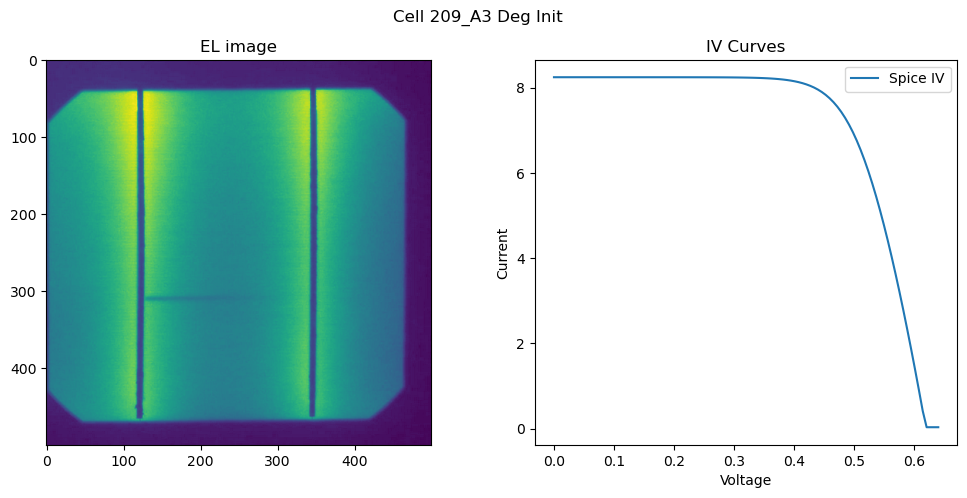

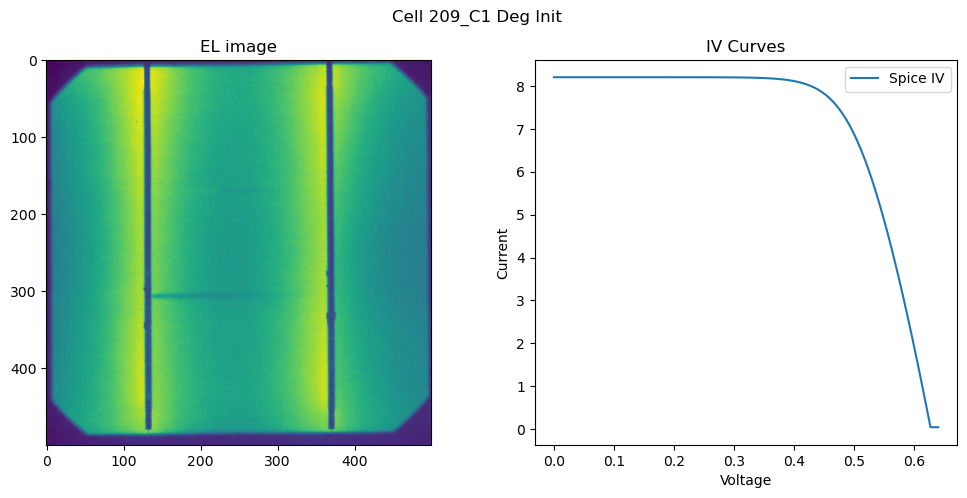

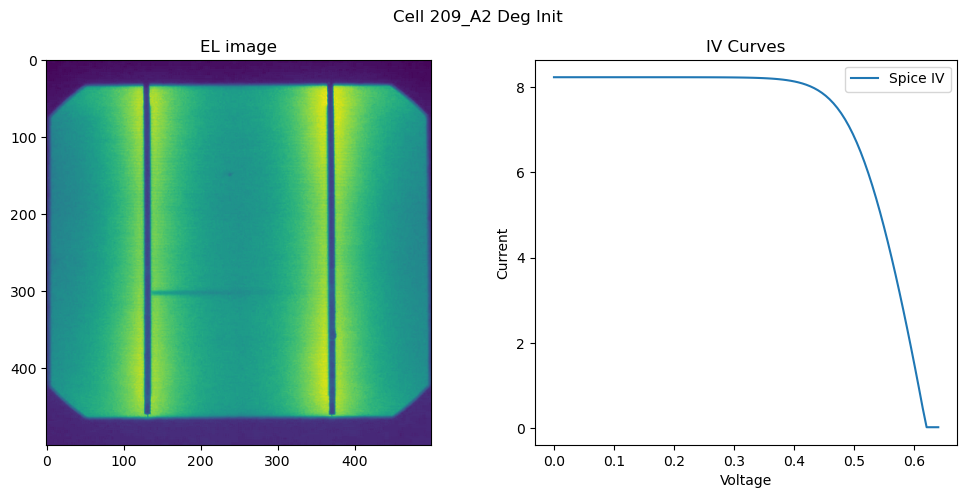

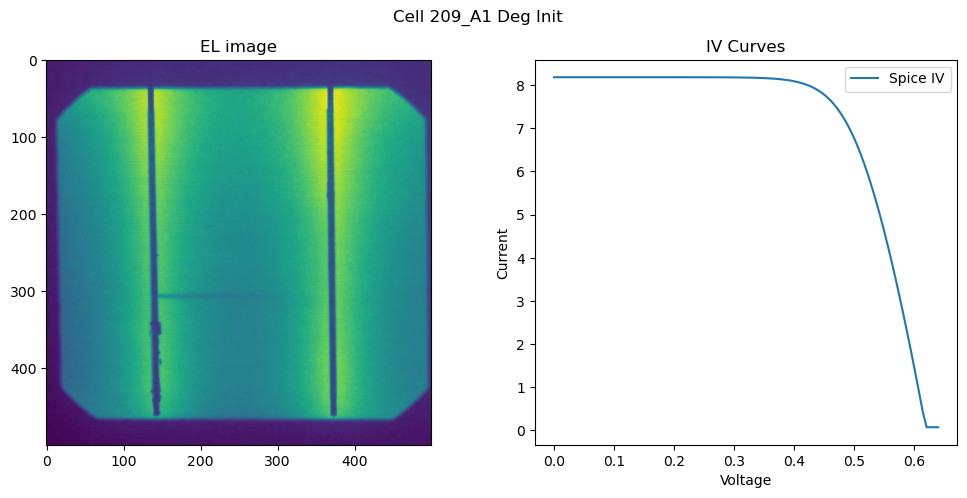

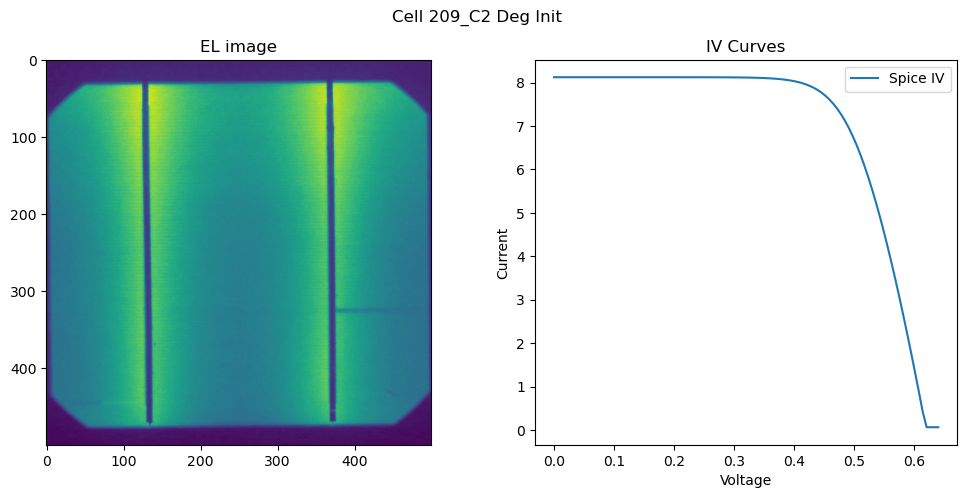

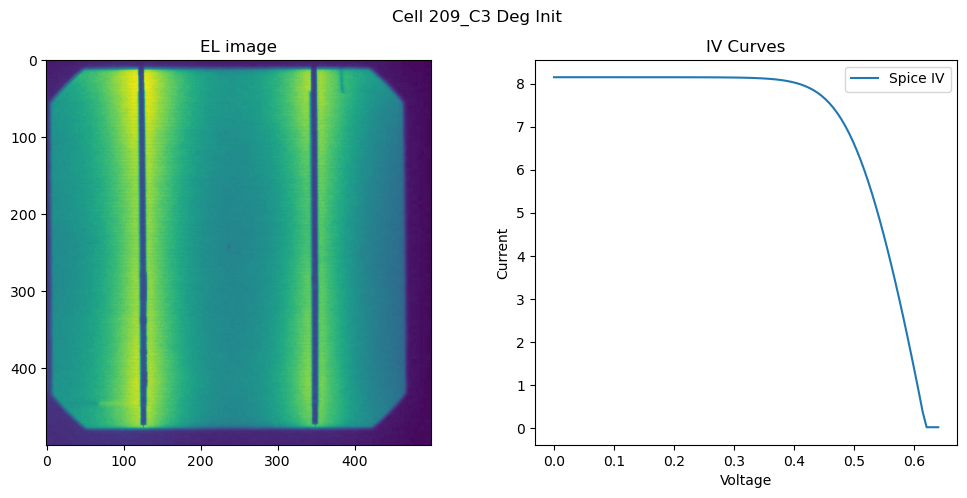

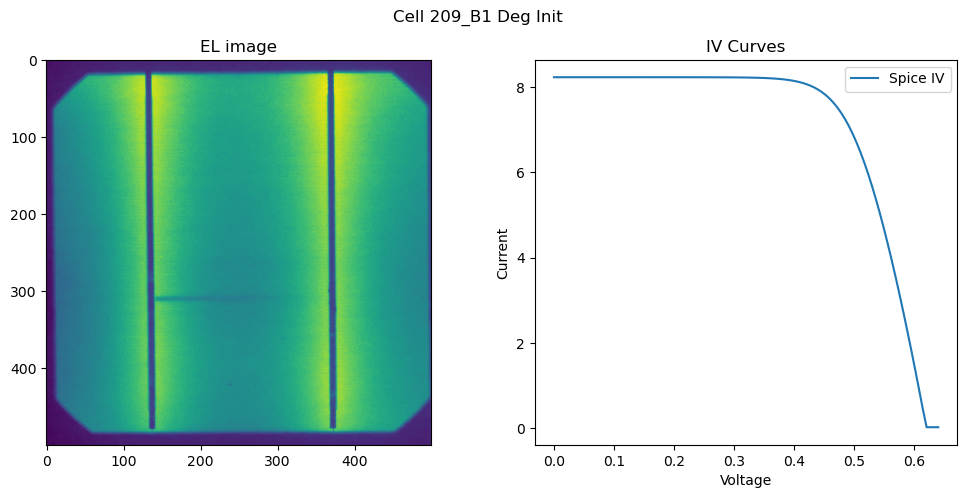

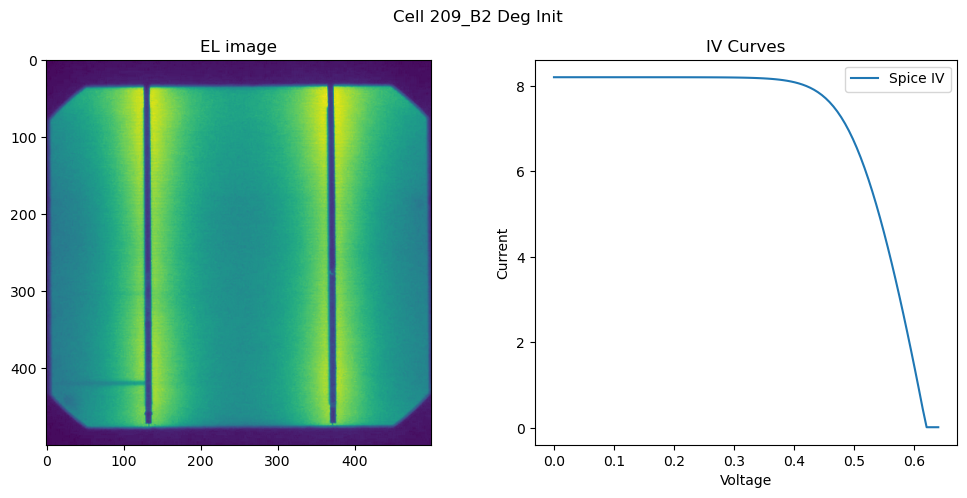

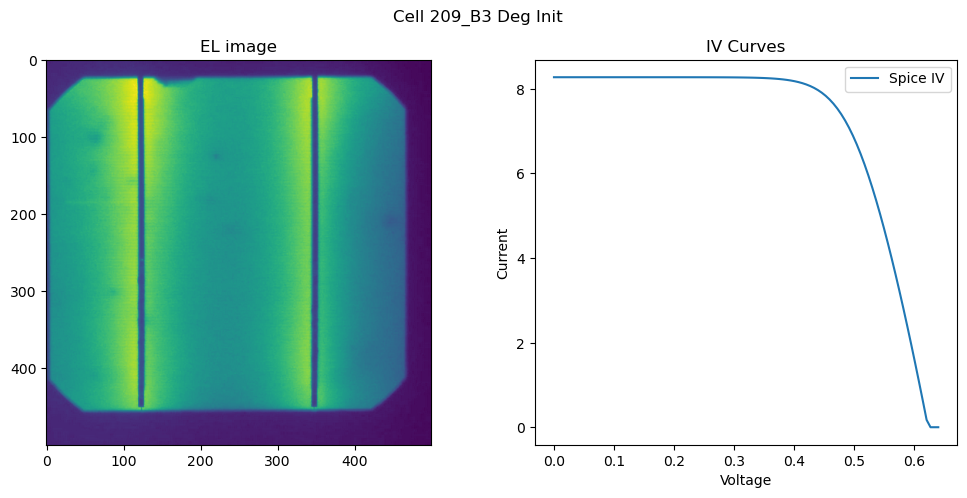

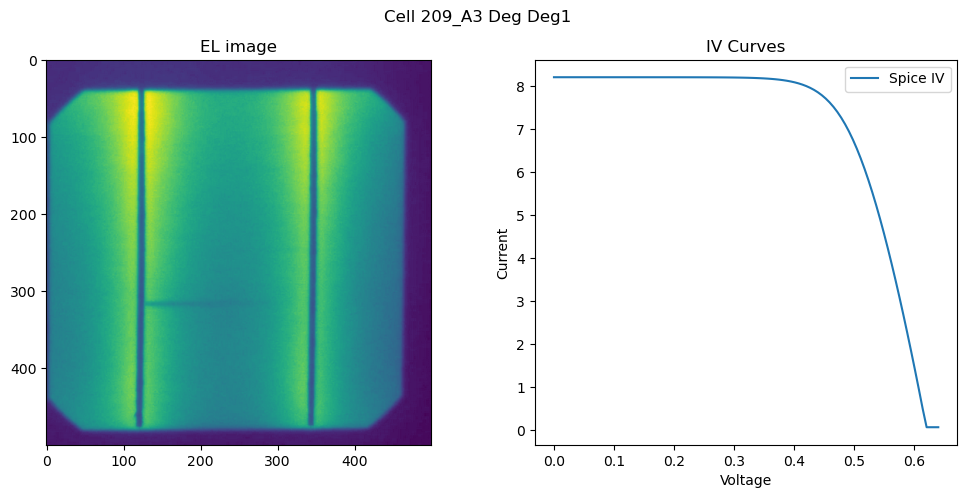

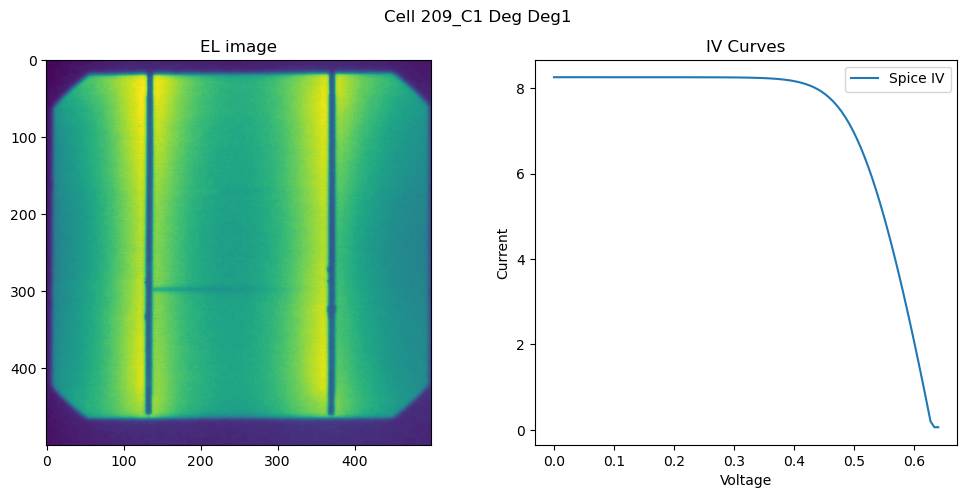

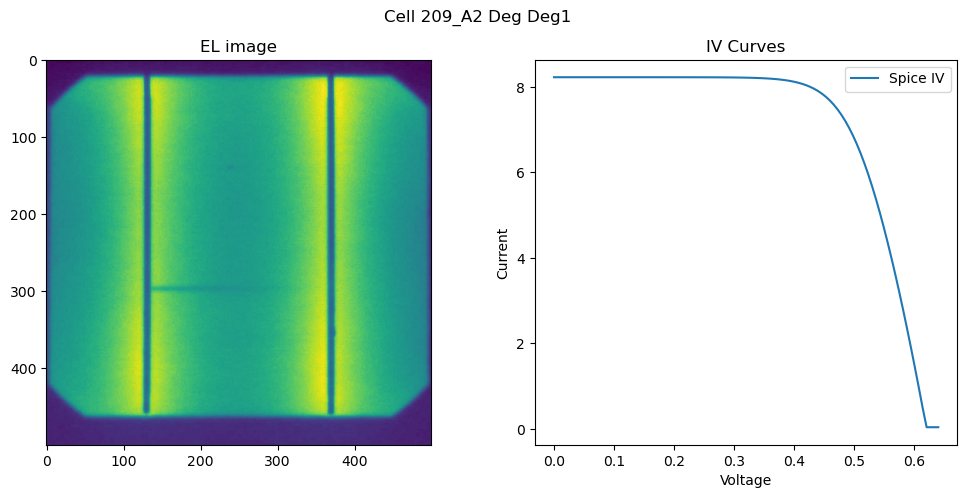

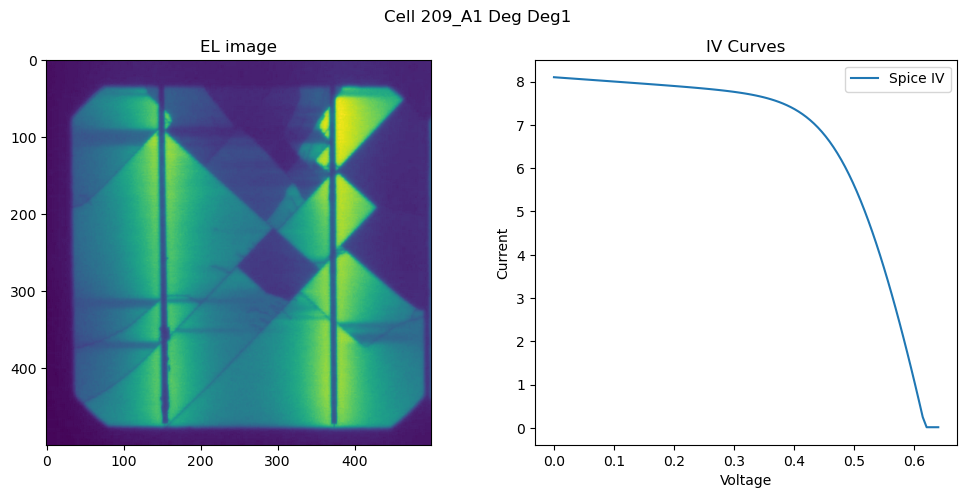

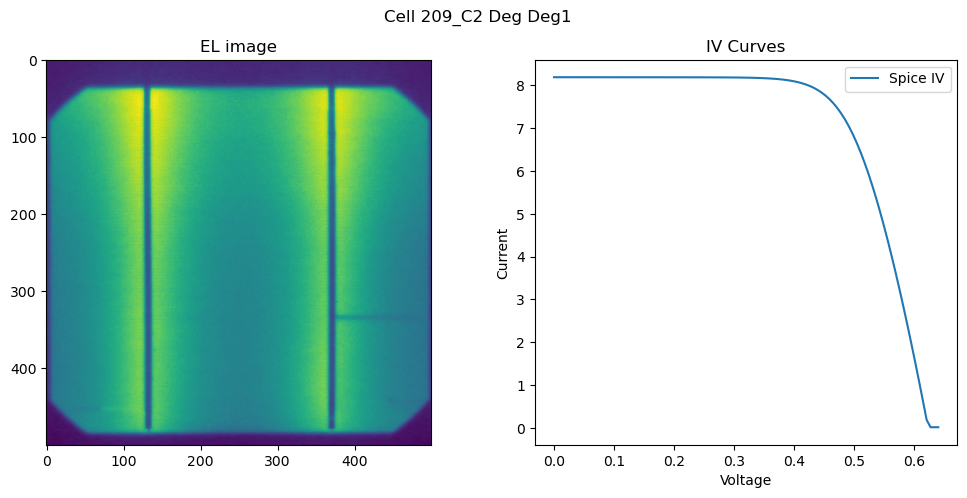

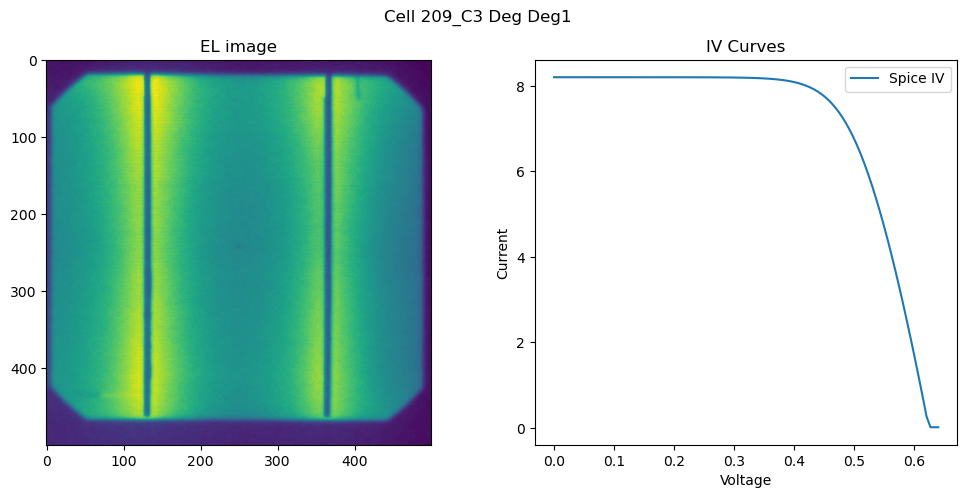

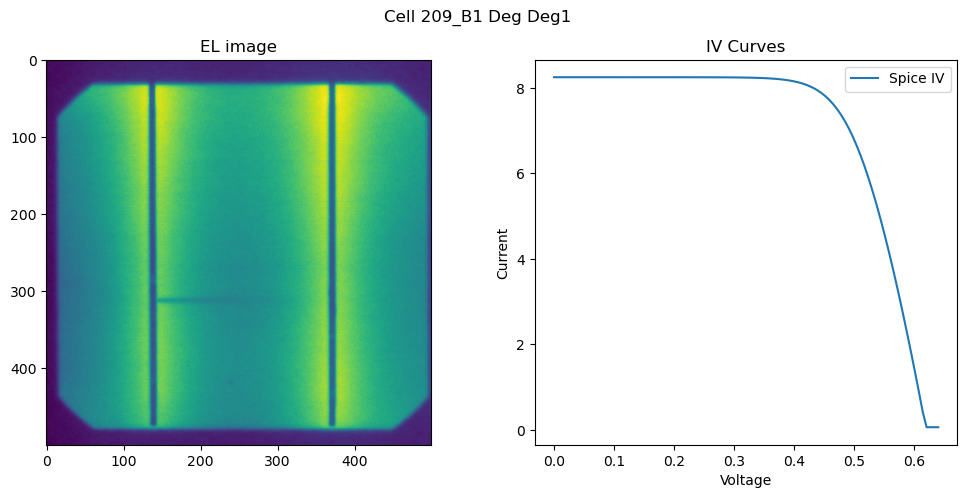

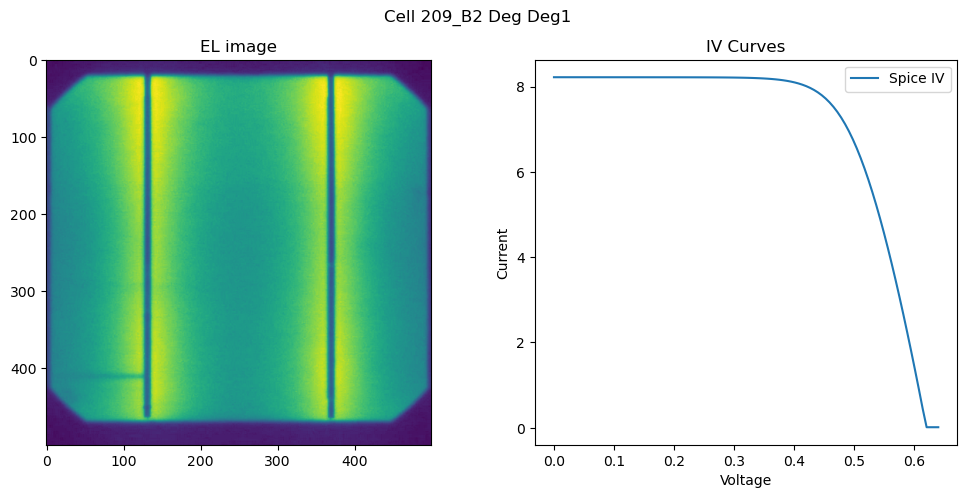

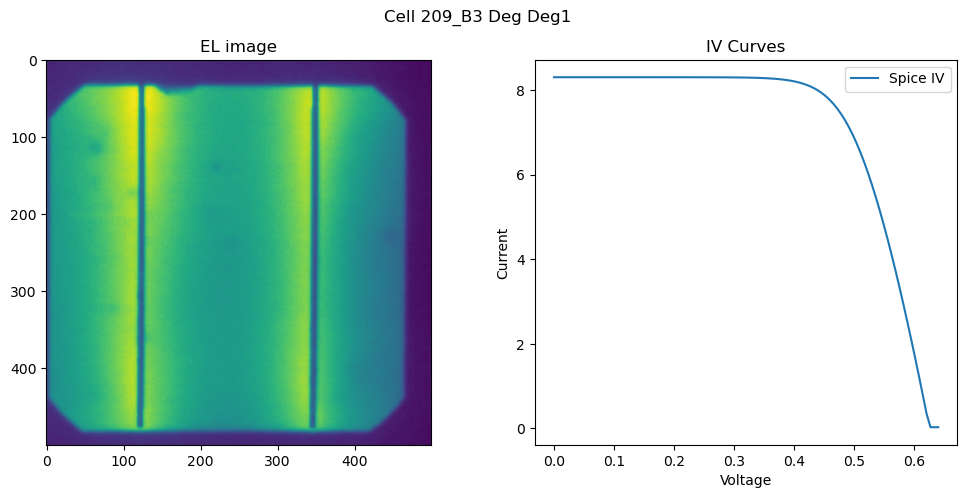

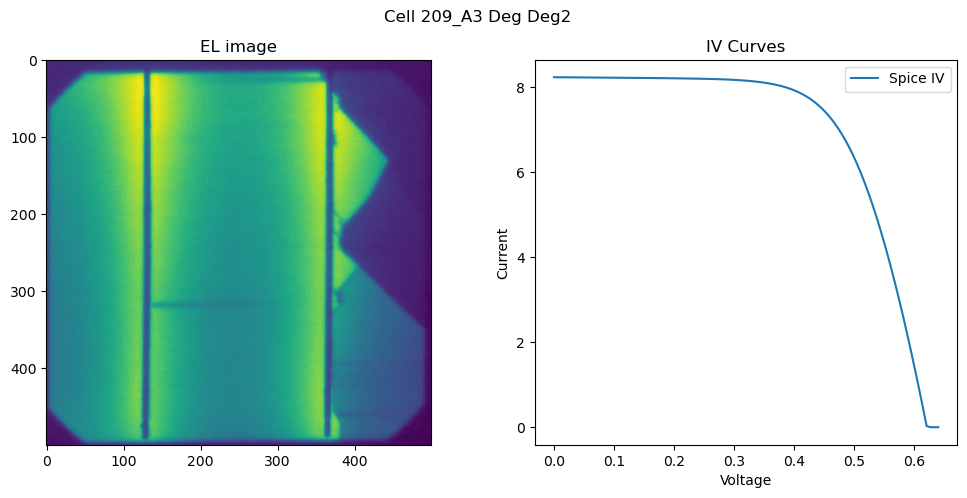

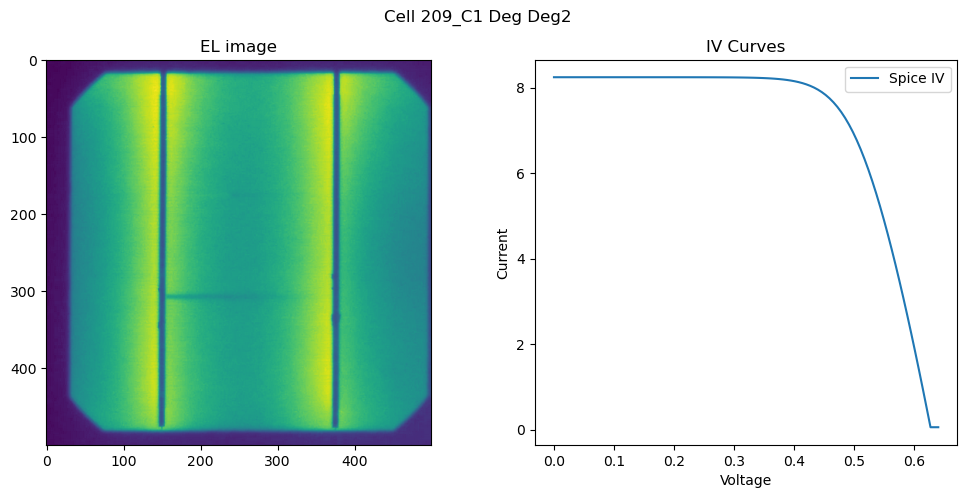

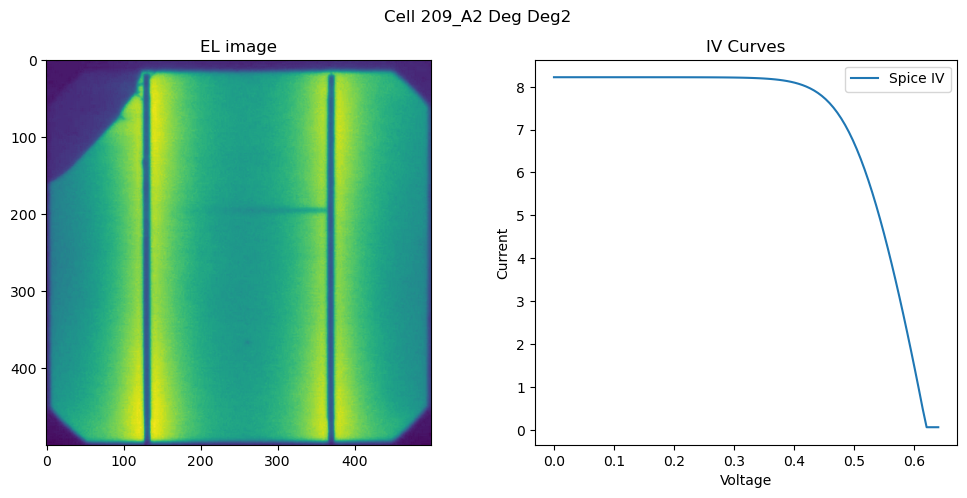

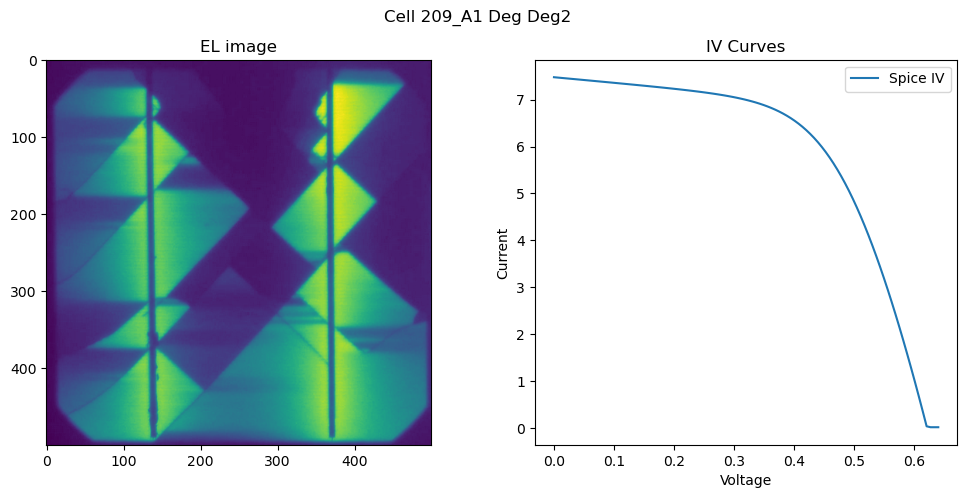

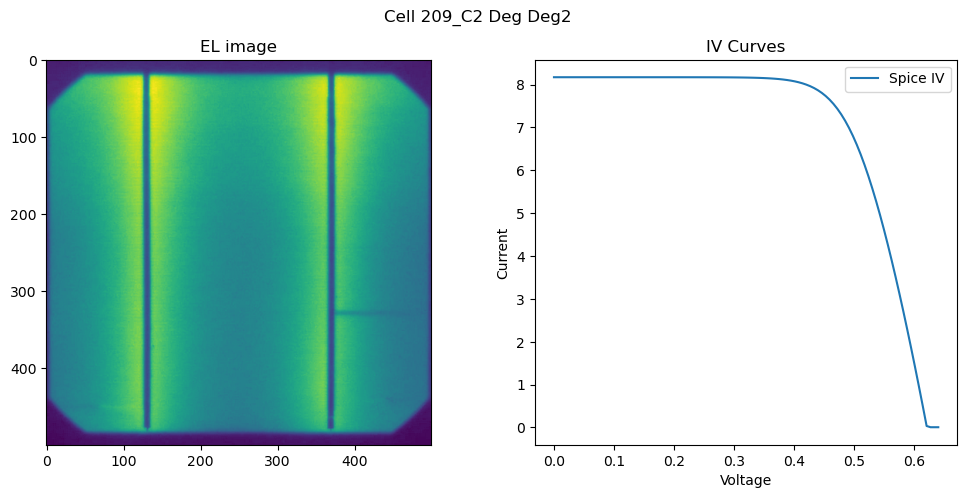

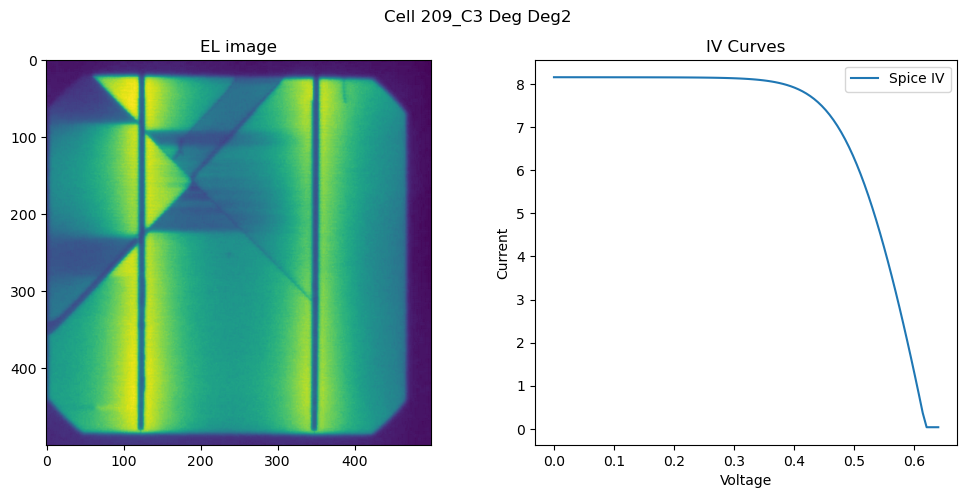

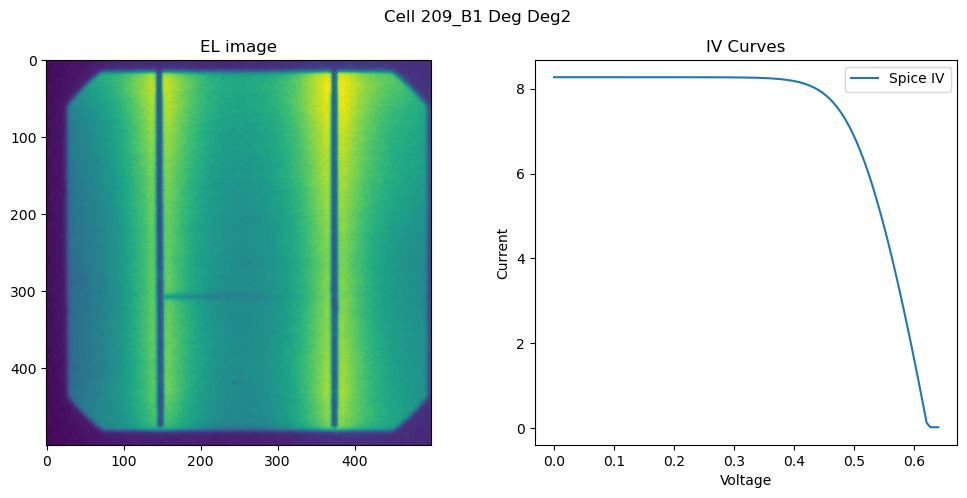

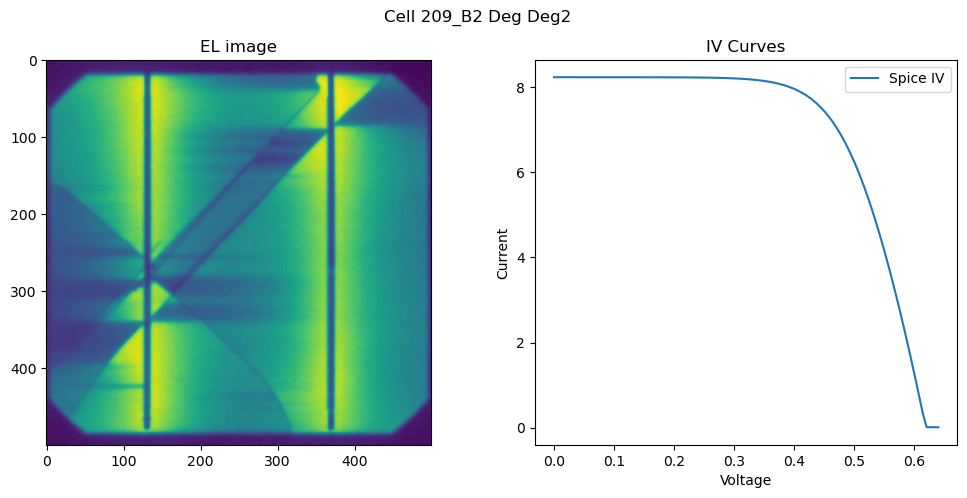

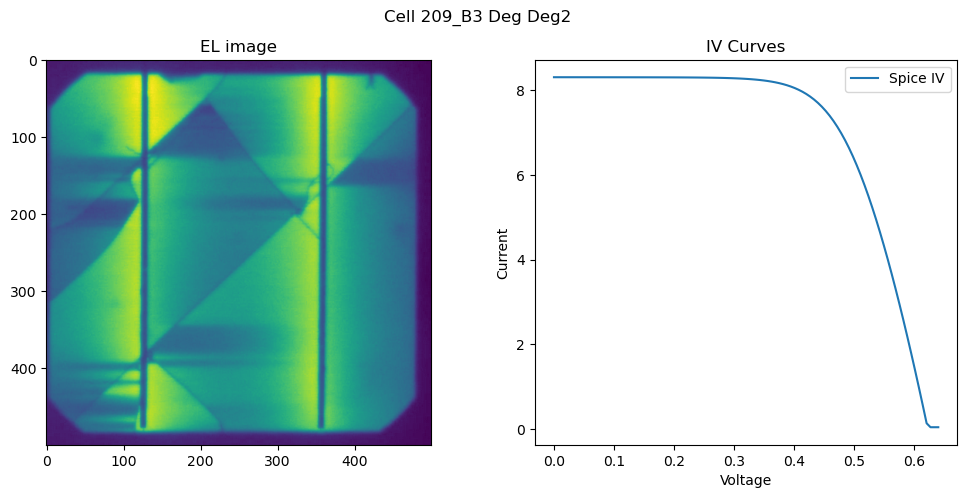

In [5]:
Cell_Parameters = Extract_Params(Cell9Master)
for ind, row in Cell9Master.iterrows():
    file_path = f"{os.getcwd()}/pvcracks/pvspice_lite/"
    fig, axs = plt.subplots(1, 2, figsize = (12,5))
    img = Read_EL(f"{os.getcwd()}{row.ELPath}")
    Params = [Cell_Parameters[ind]]
    V = np.linspace(0, 0.64, 100) #voltage points
    
    IV_Pred = MiniMod_Spice(Params, file_path, V, V_Step=0.001, file_name ='', spicepath=spicepath)
    
    fig.suptitle(f'Cell {row.Module} Deg {row.Deg}')
    axs[0].imshow(img)
    axs[0].set_title('EL image')
    
    # axs[1].plot(IV[0], IV[1], label = 'Measured IV')
    axs[1].plot(IV_Pred[0], IV_Pred[1], label = 'Spice IV')
    axs[1].set_xlabel('Voltage')
    axs[1].set_ylabel('Current')
    axs[1].set_title('IV Curves')
    axs[1].legend()
    
    plt.show()

# Build MiniMod

## Initial

In [6]:
Init_Cells = Cell9Master.loc[Cell9Master.Deg == 'Init'].sort_values(by=['Module'])

Text(0.5, 0, 'Sample')

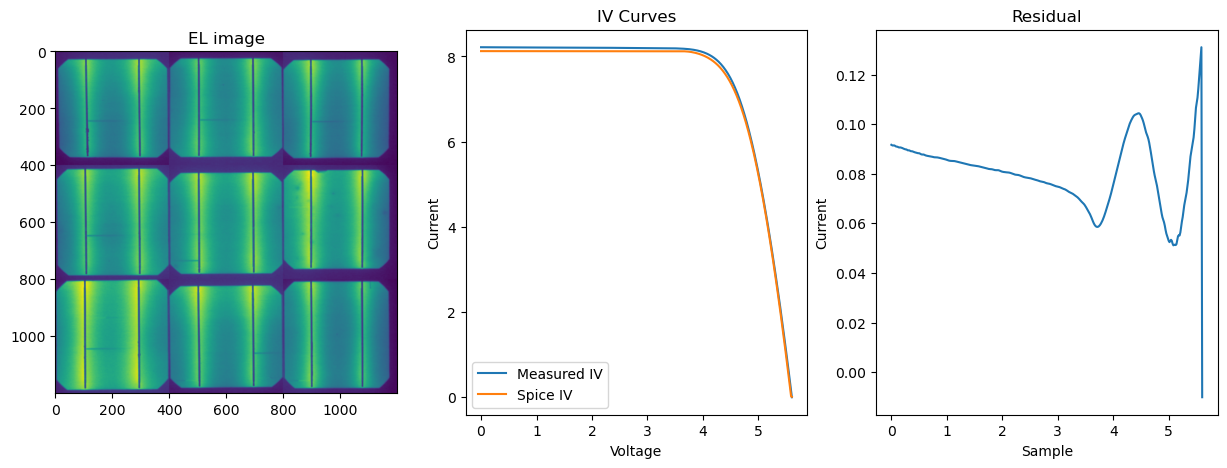

In [7]:
file_path = f"{os.getcwd()}/pvcracks/pvspice_lite/"
MMEL = cells2Mod(Init_Cells,(400,400),3,3)
Params = Extract_Params(Init_Cells)

IV_Pred =  MiniMod_Spice(Params, file_path, FM_Init[0], V_Step=0.001, file_name ='', spicepath=spicepath)


fig, axs = plt.subplots(1, 3, figsize = (15,5))
#fig.suptitle(f'Cell {row.Module} Deg {row.Deg}') # or plt.suptitle('Main title')
axs[0].imshow(MMEL)
axs[0].set_title('EL image')

axs[1].plot(FM_Init[0],FM_Init[1],label = 'Measured IV')
axs[1].plot(IV_Pred[0],IV_Pred[1],label = 'Spice IV')
axs[1].set_xlabel('Voltage')
axs[1].set_ylabel('Current')
axs[1].set_title('IV Curves')
axs[1].legend()
axs[2].set_title('Residual')
axs[2].plot(FM_Init[0],FM_Init[1] - IV_Pred[1])
axs[2].set_ylabel('Current')
axs[2].set_xlabel('Sample')

## Deg1 

In [8]:
Deg1_Cells = Cell9Master.loc[Cell9Master.Deg == 'Deg1'].sort_values(by=['Module'])

Text(0.5, 0, 'Sample')

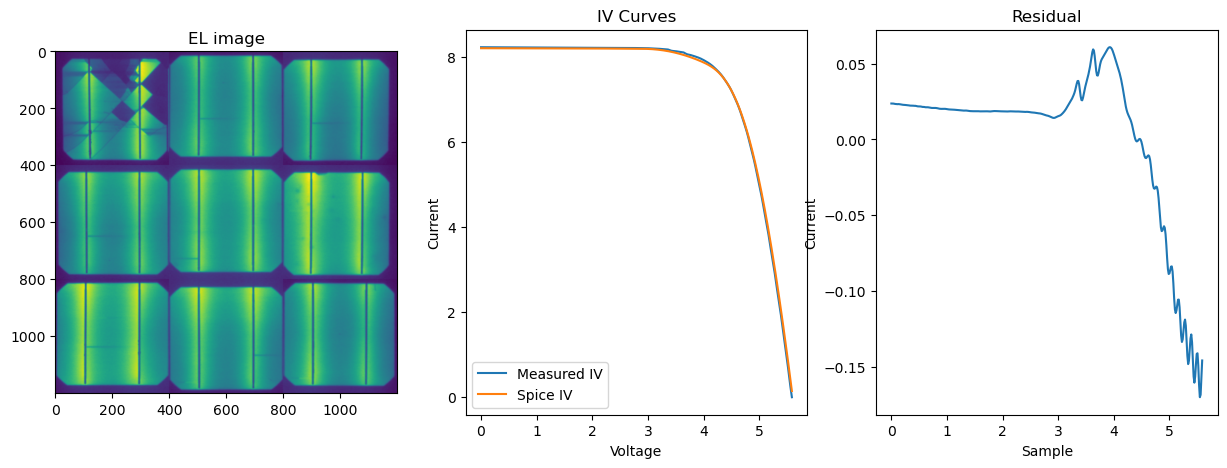

In [9]:
file_path = f"{os.getcwd()}/pvcracks/pvspice_lite/"
MMEL = cells2Mod(Deg1_Cells, (400,400), 3, 3)
Params = Extract_Params(Deg1_Cells)

IV_Pred =  MiniMod_Spice(Params, file_path, FM_Deg1[0], V_Step=0.001, file_name ='', spicepath=spicepath)


fig, axs = plt.subplots(1, 3,figsize = (15,5))
#fig.suptitle(f'Cell {row.Module} Deg {row.Deg}') # or plt.suptitle('Main title')
axs[0].imshow(MMEL)
axs[0].set_title('EL image')

axs[1].plot(FM_Deg1[0],FM_Deg1[1],label = 'Measured IV')
axs[1].plot(IV_Pred[0],IV_Pred[1],label = 'Spice IV')
axs[1].set_xlabel('Voltage')
axs[1].set_ylabel('Current')
axs[1].set_title('IV Curves')
axs[1].legend()
axs[2].set_title('Residual')
axs[2].plot(FM_Deg1[0],FM_Deg1[1] - IV_Pred[1])
axs[2].set_ylabel('Current')
axs[2].set_xlabel('Sample')

## Deg 2

In [10]:
Deg2_Cells = Cell9Master.loc[Cell9Master.Deg == 'Deg2'].sort_values(by=['Module'])

In [ ]:
file_path = f"{os.getcwd()}/pvcracks/pvspice_lite/"
MMEL = cells2Mod(Deg2_Cells, (400,400), 3, 3)
Params = Extract_Params(Deg2_Cells)

IV_Pred =  MiniMod_Spice(Params, file_path, FM_Deg2[0], V_Step=0.001, file_name ='', spicepath=spicepath)


fig, axs = plt.subplots(1, 3,figsize = (15,5))
#fig.suptitle(f'Cell {row.Module} Deg {row.Deg}') # or plt.suptitle('Main title')
axs[0].imshow(MMEL)
axs[0].set_title('EL image')

axs[1].plot(FM_Deg2[0],FM_Deg2[1],label = 'Measured IV')
axs[1].plot(IV_Pred[0],IV_Pred[1],label = 'Spice IV')
axs[1].set_xlabel('Voltage')
axs[1].set_ylabel('Current')
axs[1].set_title('IV Curves')
axs[1].legend()
axs[2].set_title('Residual')
axs[2].plot(FM_Deg2[0],FM_Deg2[1] - IV_Pred[1])
axs[2].set_ylabel('Current')
axs[2].set_xlabel('Sample')

Text(0.5, 0, 'Sample')